In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load datasets
trades = pd.read_csv("historical_data.csv", low_memory=False)
sentiment = pd.read_csv("fear_greed_index.csv")

In [9]:
print(trades.columns)
print(sentiment.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [14]:
trades = trades.dropna(subset=["Closed PnL"])
trades = trades[["Account", "Closed PnL", "Size USD", "Direction", "Date"]]

trades = trades.rename(columns={
    "Account": "account",
    "Closed PnL": "closedPnL",
    "Size USD": "size",
    "Direction": "side"
})


In [15]:
merged = pd.merge(trades, sentiment, on="Date", how="inner")
merged.head()

,account,closedPnL,size,side,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,Buy,NaT,1518499800,35,Fear
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,Buy,NaT,1518586200,55,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,Buy,NaT,1518672600,71,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,Buy,NaT,1518759000,67,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,0.0,7872.16,Buy,NaT,1518845400,74,Greed


In [19]:
trades.columns = trades.columns.str.strip()
sentiment.columns = sentiment.columns.str.strip()
print(trades.columns)
print(sentiment.columns)

Index(['account', 'closedPnL', 'size', 'side', 'Date'], dtype='object')
Index(['timestamp', 'value', 'classification', 'Date'], dtype='object')


In [22]:
sentiment["Date"] = pd.to_datetime(sentiment["timestamp"], unit="s").dt.floor("D")

In [23]:
merged = pd.merge(trades, sentiment, on="Date", how="inner")
merged.head()


,account,closedPnL,size,side,Date,timestamp,value,classification


In [24]:
merged.shape
merged[["Date", "classification", "closedPnL", "size"]].head()


,Date,classification,closedPnL,size


In [25]:
merged.to_csv("merged_data.csv", index=False)


In [26]:
daily = merged.groupby(["Date", "classification"]).agg(
    total_pnl=("closedPnL", "sum"),
    avg_pnl=("closedPnL", "mean"),
    total_volume=("size", "sum"),
    trade_count=("closedPnL", "count")
).reset_index()

daily.head()


,Date,classification,total_pnl,avg_pnl,total_volume,trade_count


In [27]:
daily.to_csv("daily_trader_metrics.csv", index=False)


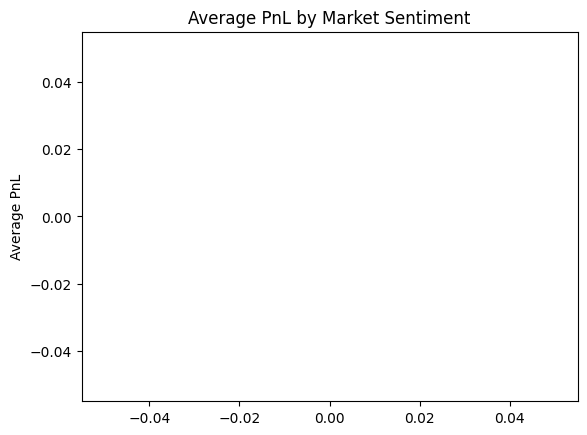

In [28]:
pnl = merged.groupby("classification")["closedPnL"].mean()

plt.figure()
plt.bar(pnl.index, pnl.values)
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.savefig("pnl_by_sentiment.png")
plt.show()


In [29]:
print(merged["classification"].value_counts())
print(merged["closedPnL"].describe())


Series([], Name: count, dtype: int64)
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: closedPnL, dtype: float64


In [31]:
trades = pd.read_csv("historical_data.csv", low_memory=False)
trades.columns = trades.columns.str.strip()

In [32]:
print(trades.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [34]:
trades["Date"] = pd.to_datetime(trades["Timestamp"], unit="ms").dt.floor("D")

In [35]:
sentiment["Date"] = pd.to_datetime(sentiment["timestamp"], unit="ms").dt.floor("D")

In [36]:
merged = pd.merge(trades, sentiment, on="Date", how="inner")
print(merged.shape)
merged.head()

(0, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification


In [37]:
print("Trades date range:")
print(trades["Date"].min(), "to", trades["Date"].max())

print("\nSentiment date range:")
print(sentiment["Date"].min(), "to", sentiment["Date"].max())


Trades date range:
2024-03-09 00:00:00 to 2025-06-15 00:00:00

Sentiment date range:
1970-01-18 00:00:00 to 1970-01-21 00:00:00


In [38]:
sentiment["Date"] = pd.to_datetime(sentiment["timestamp"], unit="s").dt.floor("D")


In [39]:
print("Sentiment date range:")
print(sentiment["Date"].min(), "to", sentiment["Date"].max())


Sentiment date range:
2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [40]:
merged = pd.merge(trades, sentiment, on="Date", how="inner")
print(merged.shape)
merged.head()


(30263, 20)


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,Date,timestamp,value,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22.50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22.50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22.50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-10-27,1730007000,74,Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22.50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-10-27,1730007000,74,Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22.50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-10-27,1730007000,74,Greed


In [41]:
sentiment["Date"].min(), sentiment["Date"].max()
merged.shape

(30263, 20)

In [42]:
merged["classification"].value_counts()

,count
classification,
Fear,20730
Greed,4110
Extreme Greed,3859
Neutral,1564


In [43]:
daily = merged.groupby(["Date", "classification"]).agg(
    total_pnl=("Closed PnL", "sum"),
    avg_pnl=("Closed PnL", "mean"),
    total_volume=("Size USD", "sum"),
    trade_count=("Closed PnL", "count")
).reset_index()

daily.head()


,Date,classification,total_pnl,avg_pnl,total_volume,trade_count
0,2024-03-09,Extreme Greed,1.799226e+05,46.624155,1.582467e+07,3859
1,2024-07-03,Neutral,1.195721e+05,76.452752,1.377756e+07,1564
2,2024-10-27,Greed,5.437626e+04,13.230233,4.506478e+07,4110
3,2025-02-19,Fear,3.197554e+06,154.247648,3.213002e+08,20730


In [44]:
merged.to_csv("merged_data.csv", index=False)
daily.to_csv("daily_trader_metrics.csv", index=False)

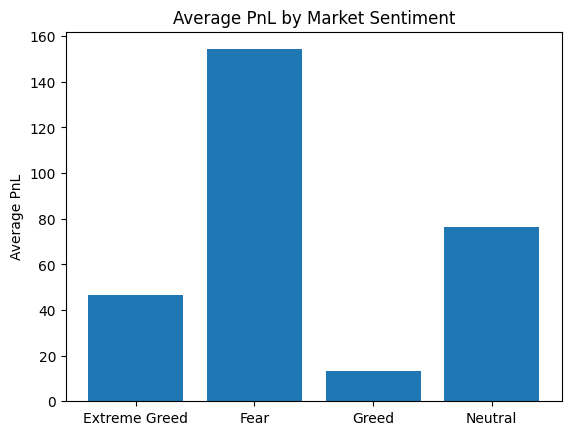

In [45]:
pnl = merged.groupby("classification")["Closed PnL"].mean()

plt.figure()
plt.bar(pnl.index, pnl.values)
plt.title("Average PnL by Market Sentiment")
plt.ylabel("Average PnL")
plt.savefig("pnl_by_sentiment.png")
plt.show()

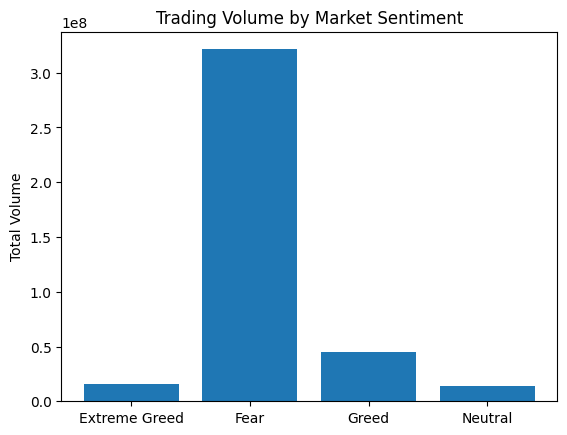

In [46]:
volume = merged.groupby("classification")["Size USD"].sum()

plt.figure()
plt.bar(volume.index, volume.values)
plt.title("Trading Volume by Market Sentiment")
plt.ylabel("Total Volume")
plt.savefig("volume_by_sentiment.png")
plt.show()

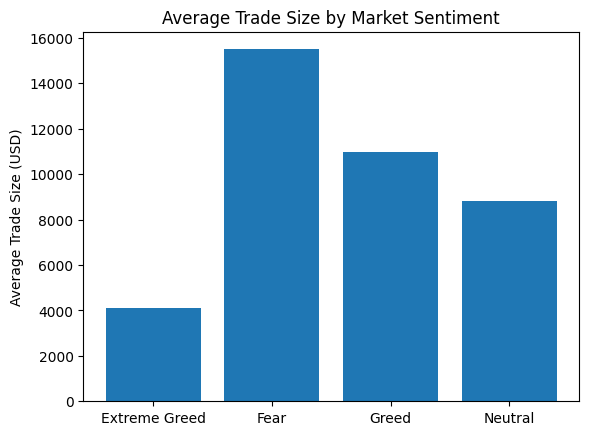

In [47]:
risk = merged.groupby("classification")["Size USD"].mean()

plt.figure()
plt.bar(risk.index, risk.values)
plt.title("Average Trade Size by Market Sentiment")
plt.ylabel("Average Trade Size (USD)")
plt.savefig("leverage_by_sentiment.png")
plt.show()